# Importing XLSX file (EXCEL)

In [1]:
import pandas as pd
path = "C:/Users/vijai/Desktop/Module_13_Data Analysiss/CONTENT FILES/data.xlsx"
df = pd.read_excel(path)
print(df)

C:\Users\vijai\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


   Sl.No    A    B    C    D    E    F  Length
0      1   10   11   12   13   14   15      26
1      2   20   21   22   23   24   25      45
2      3   30   31   32   33   34   35      35
3      4   40   41   42   43   44   45      65
4      5   50   51   52   53   54   55      76
5      6   60   61   62   63   64   65      45
6      7   70   71   72   73   74   75      34
7      8   80   81   82   83   84   85      23
8      9   90   91   92   93   94   95      20
9     10  100  101  102  103  104  105      21


In [2]:
df.head()

,Sl.No,A,B,C,D,E,F,Length
0,1,10,11,12,13,14,15,26
1,2,20,21,22,23,24,25,45
2,3,30,31,32,33,34,35,35
3,4,40,41,42,43,44,45,65
4,5,50,51,52,53,54,55,76


# Cleaning the Data set by changing Header Names

In [3]:
headers = ["Sl.No.", "Code_1","Code_2","Code_3", "Code_4","Code_5"]

df.columns = headers #It replaces the column names with above names

df.head()

ValueError: Length mismatch: Expected axis has 8 elements, new values have 6 elements

In [ ]:
# Changing the COde_2 of all rows by adding + 3

df['Code_2'] = df['Code_2'] + 3

df.head()

In [ ]:
print(df) #In excel sheet added one row and two columns with no numbers

# NaN MEANS - Not A Number

## To delete the row

In [ ]:
#df.drop([10], axis = 0) #axis = 0 means ROW #axis = 1 Means COLUMN

#df.dropna(subset =['Code_2], axis =0') #TO drop all NaN in the 10th row of the abpve table

print(df)

## Replacing the NaN Values


In [ ]:
# To replace NaN Values we need to import NUMPY as NP to perform this operation

import numpy as np

df['Code_1'].replace(np.nan, 110)

## Divide the Code_6 column with 5 and rename as code_55

In [ ]:
df['Code_6'] = df['Code_6'] / 5

In [ ]:
print(df)


In [ ]:
df.rename(columns = {"Code_6":"Code_55"}, inplace = True ) # inplace is meant to take a change of name when ever we are changing the names of coloumns
print(df)

In [ ]:
df.dtypes

## Converting - column name Code-55 Float to Integer


In [ ]:

df.drop([10], axis=0)
#df['Code_55']=df['Code_55'].astype('int')


In [ ]:
df['Code_55'] = df['Code_55'].astype('Int64')


In [ ]:
df.dtypes

# Data Normalisation

## Normalise - In this age and salary are between 0 and 1

## Not Normalise - In this age and salaray are in different range

### 3 Methods in Data Normalisation

# Simple Feature Scaling Method 
## Mathematical Calculation

 $x_{new} = \frac{x_{old}}{x_{max}}$

## Result Range 0 and 1


# Min - Max Method

$$
x_{\text{new}} = \frac{x_{\text{old}} - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$$


## Result Range from 0 and 1


# Z-Score / Standard Score Method

$$
x_{\text{new}} = \frac{x_{\text{old}} - \mu}{\sigma}
$$



### Range between -3 to +3

In [ ]:
# SIMPLE FEATURE SCALING METHOD
print(df) #Lenght is in NOT NORMALISED FORMAT

In [ ]:

df['Simple_Method']= df['Length']/df['Length'].max()
df.head(5) #Length is in NORMALISED FORMAT

In [ ]:
#MIN - MAX Method

df['Min_Max_Method'] = df['Length']-df['Length'].min()/(df['Length'].max()-df['Length'].min())

In [ ]:
df.head(5)

In [ ]:
# Z - SCORE METHOD

df['Z_Score_Method'] = (df['Length']-df['Length'].mean())/df['Length'].std()

In [ ]:
df.head(5)

# Binning - Adjust Groups values into BINS, It also converts numerical data to categorical data

## To Convert Numerical Data to Categorical Data - We need to import NUMPY library

In [ ]:
# NUMERICAL DATA TO CATEGORICAL Data

import numpy as np
bins = np.linspace(min(df['Length']),max(df['Length']),4)

In [ ]:
group_names = ['Low','Medium','High']

In [ ]:
df['Length_Binned']=pd.cut(df['Length'], bins, labels = group_names, include_lowest = True)

In [ ]:
df.head(5)

In [ ]:
# CATEGORICAL DATA TO NUMERICAL DATA

## For this We need to use PANDAS
print(df)
pd.get_dummies(df['Length']).astype(int)

In [ ]:
index = pd.Index(df['Length'])
index.value_counts()

# Box Plot

In [ ]:
import seaborn as sns

sns.boxplot(x = 'Length', y = 'A', data = df )

# Scatter Plot

In [ ]:
import matplotlib.pyplot as plt
x = df['Length']
y = df['A']

plt.scatter(x,y)
plt.title('Scatterplot along the X and Y axis')
plt.xlabel('Length')
plt.ylabel('Width')




# Groupby

In [ ]:
import numpy as np

grp = df.groupby('A')
grp.aggregate(np.sum)

In [ ]:
import numpy as np

grp = df.groupby(['A', 'B'])
grp.aggregate(np.sum)

In [ ]:
grp = df.groupby(['A', 'B'], as_index = False) #as_index adjust the spaces
grp.aggregate(np.sum)

In [ ]:
grp.size()

In [ ]:
grp.count()

# Creating a new Data Frame

In [ ]:
l =[['apple', 1],['apple', 2],['apple', 3],['ball', 1],['ball', 2],['cat', 1]]

df_10 = pd.DataFrame(l, columns =['A','B'])

print(df_10)

In [ ]:
df_10.groupby('A')['B'].nunique() #for listing Unique items in the dataframe

# PIVOT

In [ ]:
df_20 = pd.DataFrame({'Sl.No':[1,2,3,4,5], 'A':['apple','ant','ankle','air','arm'], 'B':['ball','bat','baloon','bear','boy'], 'C':['cat','cake','car','cow','coat'], 'D':['dog','duck','doll','dear','drum']})
print(df_20)

In [ ]:
df_20.pivot(index = 'A', columns = 'B', values = 'C')

In [ ]:
df_20.pivot(index ='Sl.No', columns = 'A')['B']

In [ ]:
df_20.pivot(index ='Sl.No', columns = 'A', values = ['B','C'])

# Heatmap

## For creating Random Data, we need to import NUMPY



In [ ]:
import numpy as np
np.random.seed(0) # THe result of data should be same for that we need to use seed function [random.seed()]
import seaborn as sns # To plot heatmaps

uniform_data = np.random.rand(5,6) #5 means rows and 6 means columns
print(uniform_data)




In [ ]:
print(uniform_data) #it prints the same as above data, it achieved due to random.seed(0)

In [ ]:
#Heat Map

heat_map = sns.heatmap(uniform_data)


### Displaying minimum and maximum labels in the heatmap

In [ ]:
heat_map_1 = sns.heatmap(uniform_data, vmin = 0, vmax = 1)

###  Creating normal data and center the label 0 and minus values below and positive values above

In [ ]:
normal_data = np.random.randn(6,6)

print(normal_data)

In [ ]:
heat_map_2 = sns.heatmap(normal_data, center = 0)

## Loading a data set and generate heat map

In [ ]:
import seaborn as sns
print(flights)
flights = sns.load_dataset('flights') #To import the data set from the current directory
flights = flights.pivot_table(index = 'month', columns = 'year',values = 'passengers')
heat_map_3 = sns.heatmap(flights)

### To bring the numbers inside the heat map

### we use annot = True and fmt = 'd' display the numbers on the heat map

In [ ]:
import seaborn as sns

# Load the dataset from seaborn
flights = sns.load_dataset('flights')

# Pivot the DataFrame using the correct column name
flights = flights.pivot_table(index='month', columns='year', values='passengers')

# Convert the values to integers
flights = flights.astype(int)

# Create a heatmap with annotations
heat_map_4 = sns.heatmap(flights, annot=True, fmt='d')


In [ ]:
heat_map_4 = sns.heatmap(flights, annot=True, fmt='.1f')

## Changing the colors on heat map

In [ ]:
heat_map_5 = sns.heatmap(flights, cmap ='YlGnBu') #cmap for colors Yellow = Yl, Green = Gn, Blue = Bu

In [ ]:
heat_map_6 = sns.heatmap(flights, cmap ='RdBu') #Red = Rd, Blue - Bu

### To hide the bar of heat map we need to use cbar = False

In [ ]:
heat_map_6 = sns.heatmap(flights, cbar = False) # cbar = False hides the side bar

## Corelation

<Axes: xlabel='passengers', ylabel='year'>

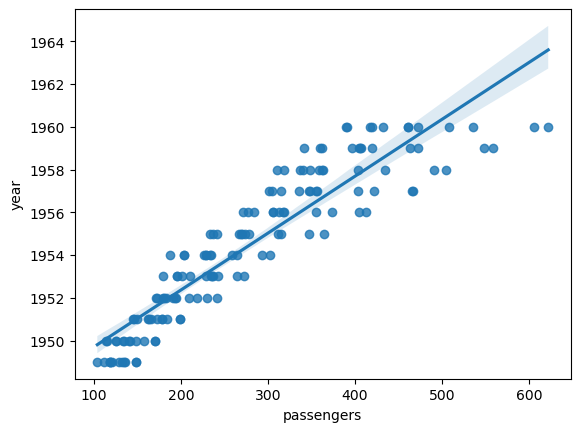

In [19]:
flights = sns.load_dataset('flights')
sns.regplot(x ='passengers', y = 'year', data = flights)

## Corelation carried out in Python

### We have to import the library scipy and stats

In [ ]:
from scipy import stats #Initial Step to find correlation of data 
flights = sns.load_dataset('flights')
print(flights)

# Pearson Corealation contains two parameters correlation coefficient and the p value

In [ ]:
pearson_corelation = stats.pearsonr(flights['year'], flights['passengers'])
print(pearson_corelation)

## In the above correlation is close to +1 - Strong Corelation
## In the above p-value e-60 means 10 power -60 is lesser the 0.001

# Both are strong both corerlation close +1 and p-value is less than 0.001 - so it is STRONG CORELATION

## LINERAR REGRESSION
## Linera Regressions is the modelling the relationship from the data
## Simple Linear Regression

![Simple Linear Regression](A.png)

![Simple Linear Regression_FORMULAE](B.png)

### With the independent variable X (matrix) we need to predict the data i.e Y

In [ ]:
#LINEAR REGRESSION
#We need to import skylearn library

from sklearn.linear_model import LinearRegression

In [ ]:
#Creating a Linear Regression Object

ln = LinearRegression()

In [ ]:
#We need to define PREDICTOR Variable and TARGET Variable
flights = sns.load_dataset('flights')

x = flights['year'].values.reshape(-1,1) #prediction Variable
y =flights['passengers'] #Target Variable

In [ ]:
#We need to fit the two variables into the model

ln.fit(x,y)

In [ ]:
yhat = ln.predict(x)
print(yhat)

In [ ]:
# to find intercept

ln.intercept_

In [ ]:
#To Find Coefficient

ln.coef_



# Muliple Linear regression

![FLow_Chart of Multiple_Linear_Regression](A_1.png)

![F O R M U L A e](A_2.png)

In [9]:
#Multiple Linear Regression

from sklearn.linear_model import LinearRegression

#Create Linear Regression Object

lm = LinearRegression()




In [10]:
print(df)

   Sl.No    A    B    C    D    E    F  Length
0      1   10   11   12   13   14   15      26
1      2   20   21   22   23   24   25      45
2      3   30   31   32   33   34   35      35
3      4   40   41   42   43   44   45      65
4      5   50   51   52   53   54   55      76
5      6   60   61   62   63   64   65      45
6      7   70   71   72   73   74   75      34
7      8   80   81   82   83   84   85      23
8      9   90   91   92   93   94   95      20
9     10  100  101  102  103  104  105      21


In [11]:
#Defining the Variable Prediction and Target Variables

x = df[['A','B','C']] #Predicted variable
y = df[['D']]

In [12]:
#We need to fit the two variables into the model

lm.fit(x,y)

LinearRegression()

In [13]:
yhat = lm.predict(x)
print(yhat)

[[ 13.]
 [ 23.]
 [ 33.]
 [ 43.]
 [ 53.]
 [ 63.]
 [ 73.]
 [ 83.]
 [ 93.]
 [103.]]


In [14]:
#FInding Intercept

lm.intercept_

array([2.])

In [15]:
#FInding Coefficient

lm.coef_


array([[0.33333333, 0.33333333, 0.33333333]])

# Regression Plot

## Vertical Axis - Dependant Variable

## Horizontal Axis -  Independent Variable

## import searborn

## import matplotlib.pyplot - to limit the plot

## Using Data set - flights

(0.0, 648.3907465055735)

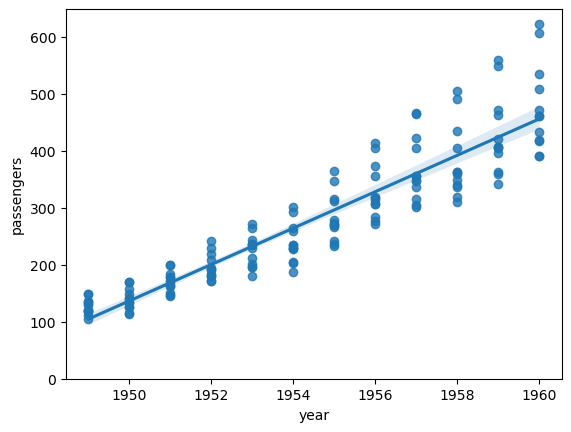

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
flights = sns.load_dataset('flights')


sns.regplot(x ='year', y = 'passengers', data = flights)
plt.ylim(0,) #specifying the limit for matplot lib to be imported



(0.0, 450.0)

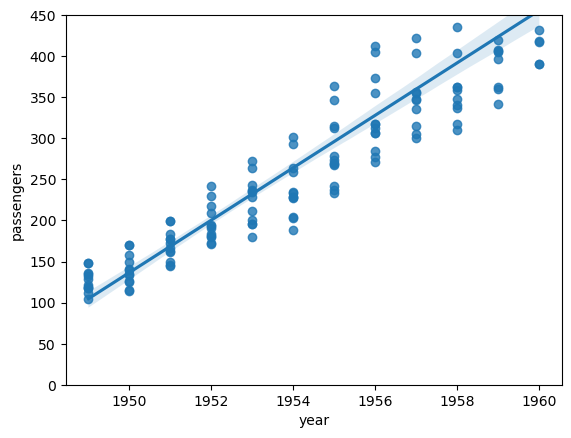

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
flights = sns.load_dataset('flights')


sns.regplot(x ='year', y = 'passengers', data = flights)
plt.ylim(0,450) #limited to 450

# Residual Plot  - A  graph that shows the differences between predicted and actual values to assess the accuracy of a model. 

# Residual Value - The difference between the observed value and the predicted value in a regression analysis.

# We need to import SEABORN


#

<Axes: xlabel='year', ylabel='passengers'>

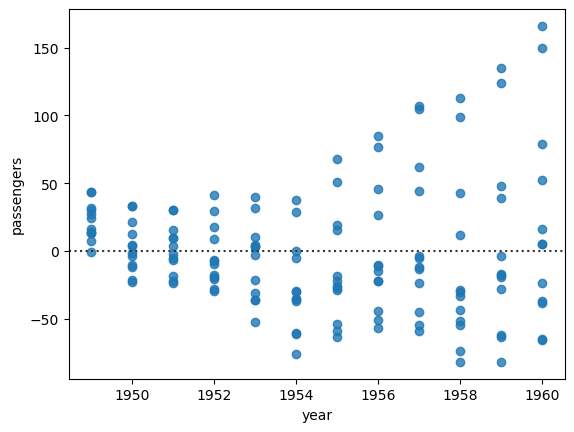

In [25]:
import seaborn as sns

sns.residplot(x = 'year', y ='passengers', data = flights)

# Distribution Plot

## It displays the numberic values plotted against the dimensions

## need to seaborn

## FOr creating random data we need to import numpy

C:\Users\vijai\AppData\Local\Temp\ipykernel_6116\2897579626.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax_1 = sns.distplot(x)
C:\Users\vijai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


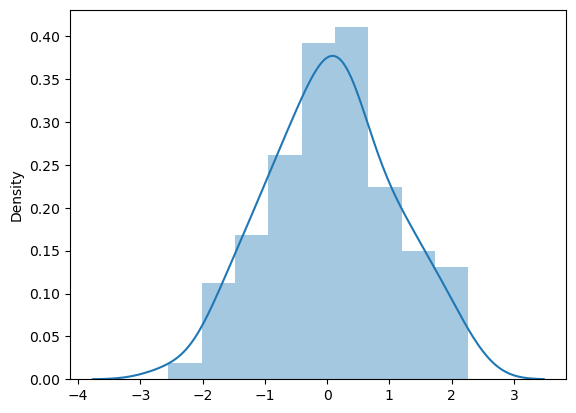

In [28]:
import seaborn as sns
import numpy as np

np.random.seed(0)
x = np.random.randn(100)

ax_1 = sns.distplot(x)




C:\Users\vijai\AppData\Local\Temp\ipykernel_6116\3250025738.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax_2 = sns.distplot(x, rug = True, hist = False)
C:\Users\vijai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vijai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opt

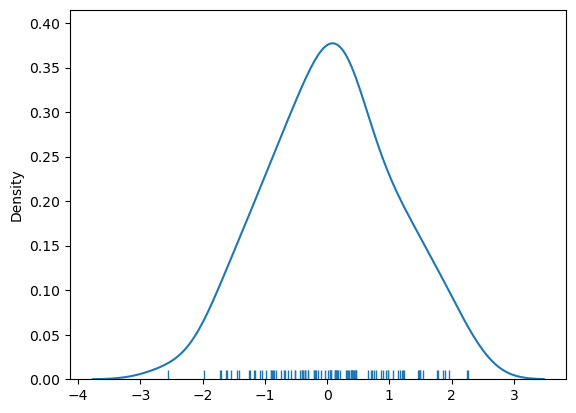

In [29]:
ax_2 = sns.distplot(x, rug = True, hist = False)

C:\Users\vijai\AppData\Local\Temp\ipykernel_6116\3896928233.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax_3 = sns.distplot(x, hist=True)
C:\Users\vijai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


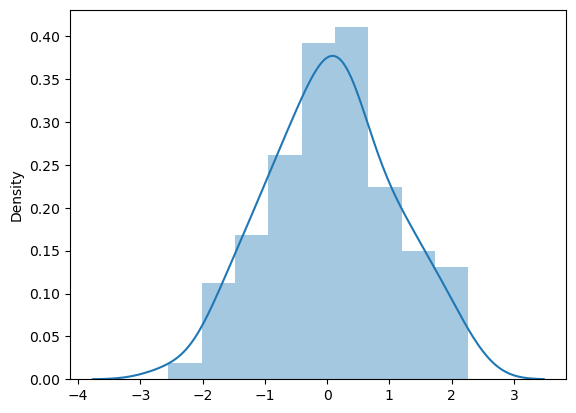

In [30]:
ax_3 = sns.distplot(x, hist=True)

C:\Users\vijai\AppData\Local\Temp\ipykernel_6116\1222213377.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax_4 = sns.distplot(x, fit = norm)
C:\Users\vijai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


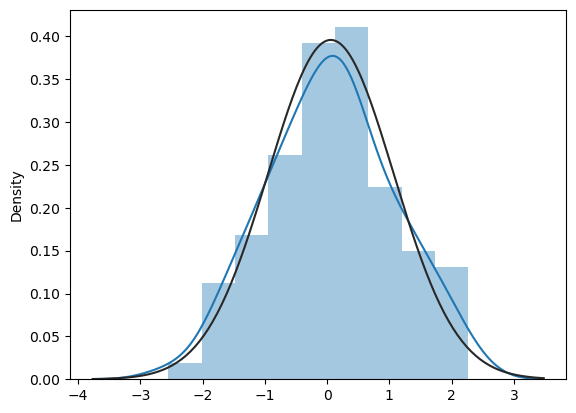

In [31]:
# Fiting the curve to histogram we need to import norm

from scipy.stats import norm

ax_4 = sns.distplot(x, fit = norm)



C:\Users\vijai\AppData\Local\Temp\ipykernel_6116\251164909.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax_4 = sns.distplot(x, fit = norm, kde = False)


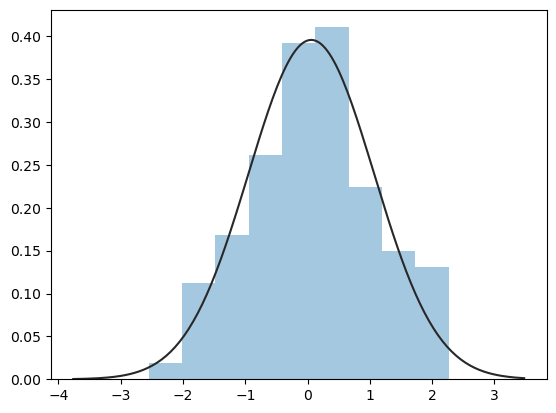

In [32]:
# To remove blue curve we need to use KDE {Kernel Density Estimate}

ax_4 = sns.distplot(x, fit = norm, kde = False)


C:\Users\vijai\AppData\Local\Temp\ipykernel_6116\3998044696.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax_5 = sns.distplot(x, vertical = True)
C:\Users\vijai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


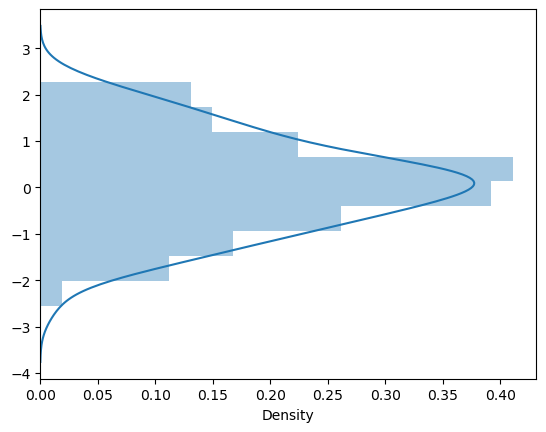

In [33]:
# Displaying the plot in Vertical

ax_5 = sns.distplot(x, vertical = True)

C:\Users\vijai\AppData\Local\Temp\ipykernel_6116\1120113044.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax_6 = sns.distplot(x, color = 'r')
C:\Users\vijai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


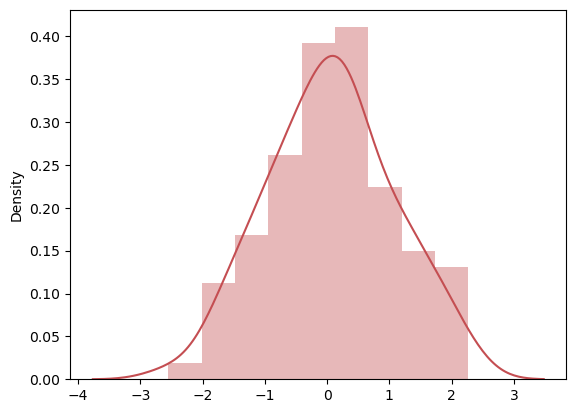

In [35]:
# To change the colors of histogram we need to call the color codes function


sns.set_color_codes()

ax_6 = sns.distplot(x, color = 'r')

C:\Users\vijai\AppData\Local\Temp\ipykernel_6116\3179364186.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax_7 = sns.distplot(x,color='g')
C:\Users\vijai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


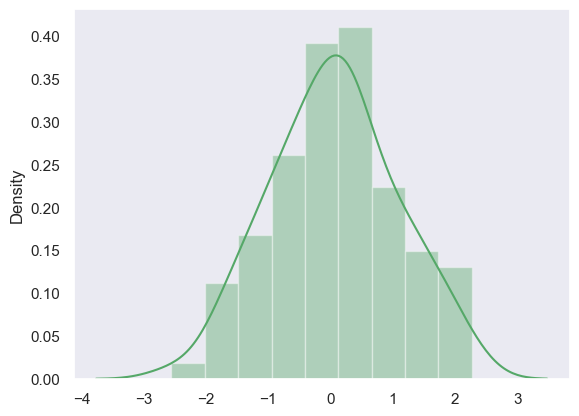

In [36]:
# Background color changing

sns.set(style = 'dark')

ax_7 = sns.distplot(x,color='g')

In [37]:
# Two Datasets on the same plot

C:\Users\vijai\AppData\Local\Temp\ipykernel_6116\751106882.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax_1 = sns.distplot(x1, color='g', label='Dataset 1', kde=True)
C:\Users\vijai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vijai\AppData\Local\Temp\ipykernel_6116\751106882.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level

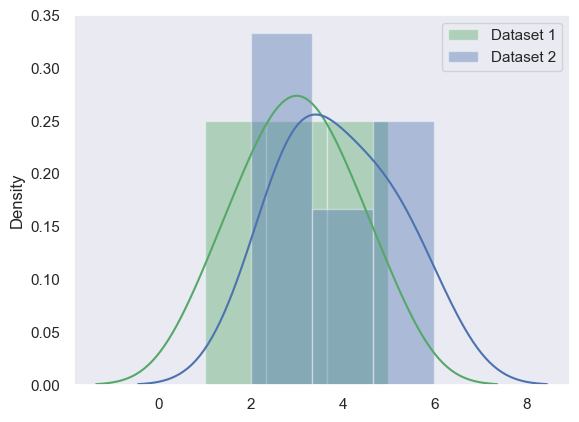

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
x1 = [1, 2, 2, 3, 3, 3, 4, 4, 5]
x2 = [2, 3, 3, 3, 4, 4, 5, 5, 6]

# Create the first histogram
ax_1 = sns.distplot(x1, color='g', label='Dataset 1', kde=True)

# Create the second histogram on the same axes
ax_2 = sns.distplot(x2, color='b', label='Dataset 2', kde=True, ax=ax_1)

# Add a legend
plt.legend()

# Show the plot
plt.show()



# POLYNOMIAL REGRESSION

## Useful for curvelinear relation ships

## We need to import library numpy

![Curvelinear Realationships](C_L.png)

In [42]:
import numpy as np

x = np.random.randn(100)
y = np.random.randn(100)

f = np.polyfit(x,y,3)

p = np.poly1d(f)

print(p)

         3           2
-0.1598 x + 0.07636 x + 0.4091 x - 0.09579


In [51]:
# To perform multidimensional polynominal regression we have to use PREPROCESSING LIBRARY



from sklearn.preprocessing import PolynomialFeatures

import seaborn as sns

flights = sns.load_dataset('flights')

pr = PolynomialFeatures(degree = 2, include_bias = False)
x_polly = pr.fit_transform(flights[['year', 'passengers']])

print(x_polly)



[[1.949000e+03 1.120000e+02 3.798601e+06 2.182880e+05 1.254400e+04]
 [1.949000e+03 1.180000e+02 3.798601e+06 2.299820e+05 1.392400e+04]
 [1.949000e+03 1.320000e+02 3.798601e+06 2.572680e+05 1.742400e+04]
 [1.949000e+03 1.290000e+02 3.798601e+06 2.514210e+05 1.664100e+04]
 [1.949000e+03 1.210000e+02 3.798601e+06 2.358290e+05 1.464100e+04]
 [1.949000e+03 1.350000e+02 3.798601e+06 2.631150e+05 1.822500e+04]
 [1.949000e+03 1.480000e+02 3.798601e+06 2.884520e+05 2.190400e+04]
 [1.949000e+03 1.480000e+02 3.798601e+06 2.884520e+05 2.190400e+04]
 [1.949000e+03 1.360000e+02 3.798601e+06 2.650640e+05 1.849600e+04]
 [1.949000e+03 1.190000e+02 3.798601e+06 2.319310e+05 1.416100e+04]
 [1.949000e+03 1.040000e+02 3.798601e+06 2.026960e+05 1.081600e+04]
 [1.949000e+03 1.180000e+02 3.798601e+06 2.299820e+05 1.392400e+04]
 [1.950000e+03 1.150000e+02 3.802500e+06 2.242500e+05 1.322500e+04]
 [1.950000e+03 1.260000e+02 3.802500e+06 2.457000e+05 1.587600e+04]
 [1.950000e+03 1.410000e+02 3.802500e+06 2.74950

# Measures For Insample Evaluation

## MSE - Means Square Error

![S T E P S To F O L L O W](S_F.png)

## We need to import from sklearn.metrics

## dataset is flights

## R Squared



In [52]:
from sklearn.metrics import mean_squared_error

flights = sns.load_dataset('flights')

mean_squared_error(flights['year'], flights['passengers'])



2816493.326388889

In [53]:
#to display in the form of array - raw_values returns the full set of errors

mean_squared_error(flights['year'], flights['passengers'], multioutput = 'raw_values')

array([2816493.32638889])

In [54]:
mean_squared_error(flights['year'], flights['passengers'], multioutput = 'uniform_average')

2816493.326388889

In [55]:
mean_squared_error(flights['year'], flights['passengers'], squared = True)

2816493.326388889

## To return ROOT MEAN SQIARED ERROR


In [56]:
mean_squared_error(flights['year'], flights['passengers'], squared = False)

1678.2411407151503

##  R-SQUARED

![____________________________________________________](R_S.png)

In [65]:
x = flights['year'].values.reshape(-1,1)
y = flights['passengers']

In [66]:
lm = LinearRegression()

In [67]:
lm.fit(x,y)

LinearRegression()

In [68]:
# R Square Values always lies between 0 and 1

lm.score(x,y)

0.8497591833132266